In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
import gspread
import pandas as pd
from google.auth import default

# Authenticate the Google account
auth.authenticate_user()

# Authorize access
creds, _ = default()
gc = gspread.authorize(creds)

# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/16j7vgw-M5tCmzqoPk0QwsvC0fnAU0fNyyYM1qy1vDZg/edit?gid=0#gid=0'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)
# Display the first few rows of the DataFrame
df.head()

,DMA / Location,CHICAGO,DETROIT,"WASHINGTON,DC","COLUMBUS,OH",BALTIMORE,ATLANTA,CLEVELAND,ST LOUIS,TAMPA,...,LANSING,FT WAYNE,YOUNGSTOWN,TRAVERSE CITY,WHEELING,SOUTH BEND,EVANSVILLE,"CHARLESTON,WV",PARKERSBURG,TOTAL
0,Aug-23,41380,33640,34100,22660,22800,24660,27480,15050,6580,...,2440,2960,2940,1330,1930,3670,2460,2950,910,403740
1,Sep-23,41280,33460,27770,18440,18700,23850,22500,14980,6440,...,2460,2960,2950,1330,1620,2980,1640,2430,900,367730
2,Oct-23,41280,33480,27790,18490,18570,23820,22520,15000,5400,...,2430,2930,2950,1320,1630,3690,1660,2450,910,365080
3,Nov-23,50440,40920,41350,27510,27710,29410,27530,18340,8090,...,3650,4440,3650,1630,2430,4470,2450,2970,1020,483160
4,Dec-23,41050,33430,27790,18410,18640,19860,22500,15030,6440,...,2930,2950,2960,1320,1920,3670,1970,2930,910,363190


In [ ]:
import datetime
#datetime.datetime.strptime(x.strip(), '%b-%y') for x in train_rows.index]

df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

df['Date'] = [datetime.datetime.strptime(x.strip(), '%b-%y') for x in df['Date']]


df.set_index('Date', inplace=True)
print(df.head())


            CHICAGO  DETROIT  WASHINGTON,DC  COLUMBUS,OH  BALTIMORE  ATLANTA  \
Date                                                                           
2023-08-01    41380    33640          34100        22660      22800    24660   
2023-09-01    41280    33460          27770        18440      18700    23850   
2023-10-01    41280    33480          27790        18490      18570    23820   
2023-11-01    50440    40920          41350        27510      27710    29410   
2023-12-01    41050    33430          27790        18410      18640    19860   

            CLEVELAND  ST LOUIS  TAMPA  NORFOLK  ...  LANSING  FT WAYNE  \
Date                                             ...                      
2023-08-01      27480     15050   6580    12350  ...     2440      2960   
2023-09-01      22500     14980   6440    10110  ...     2460      2960   
2023-10-01      22520     15000   5400    10080  ...     2430      2930   
2023-11-01      27530     18340   8090    12340  ...     3650   

<ipython-input-4-ea6dd2922697>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates=pd.date_range(start=forecast_start_date, periods=forecast_periods+1, freq='M')[1:]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


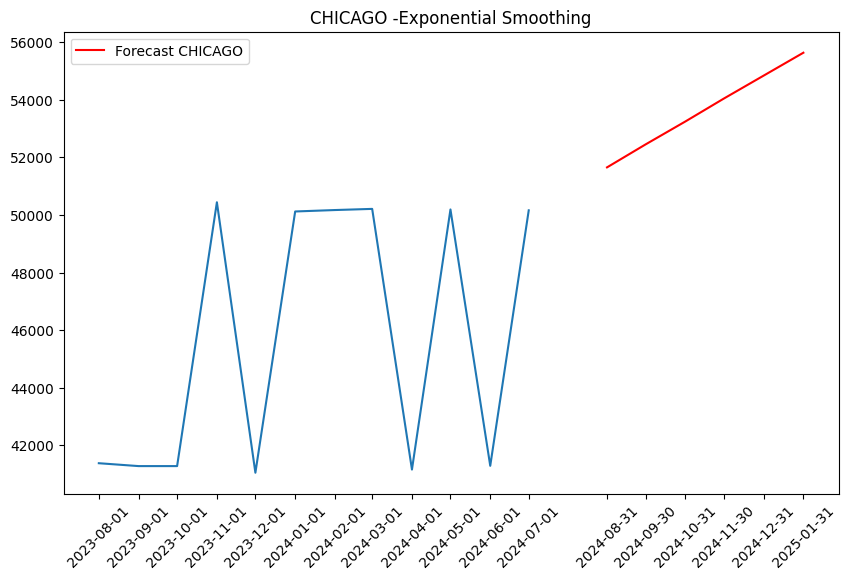

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


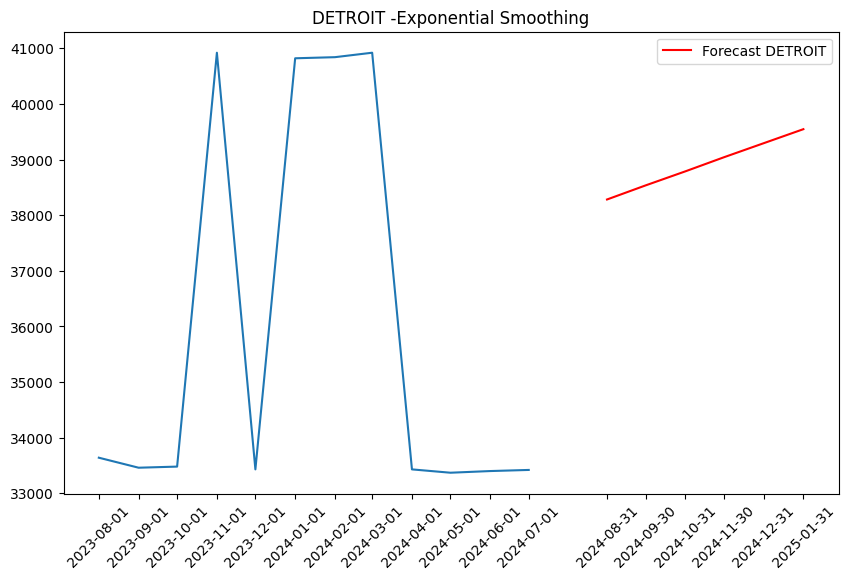

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


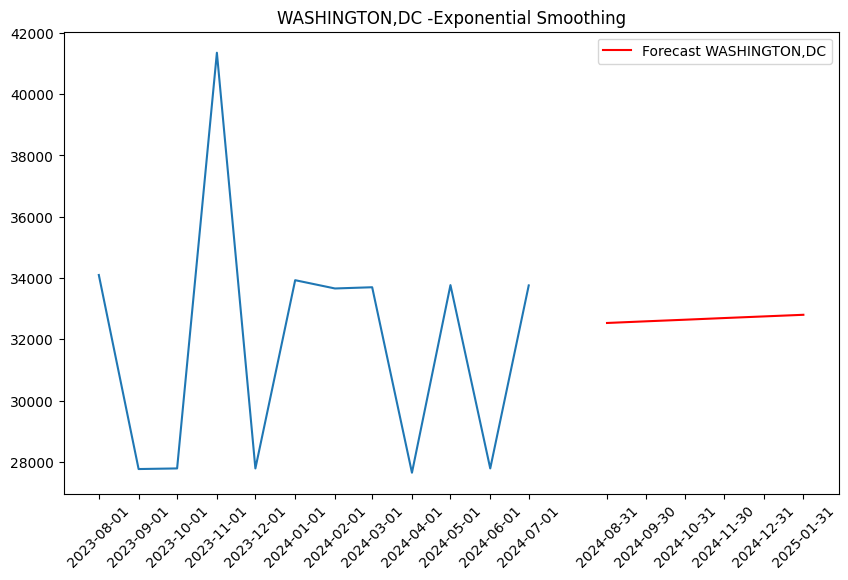

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


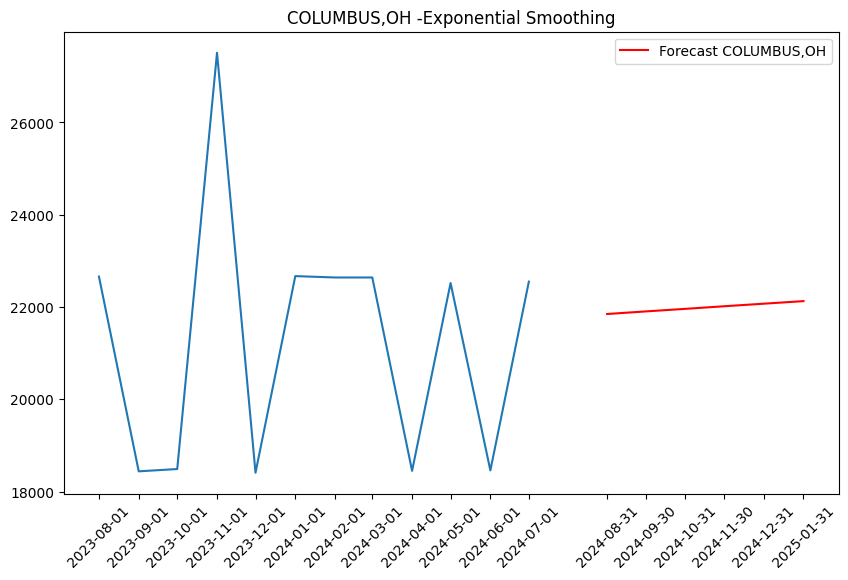

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


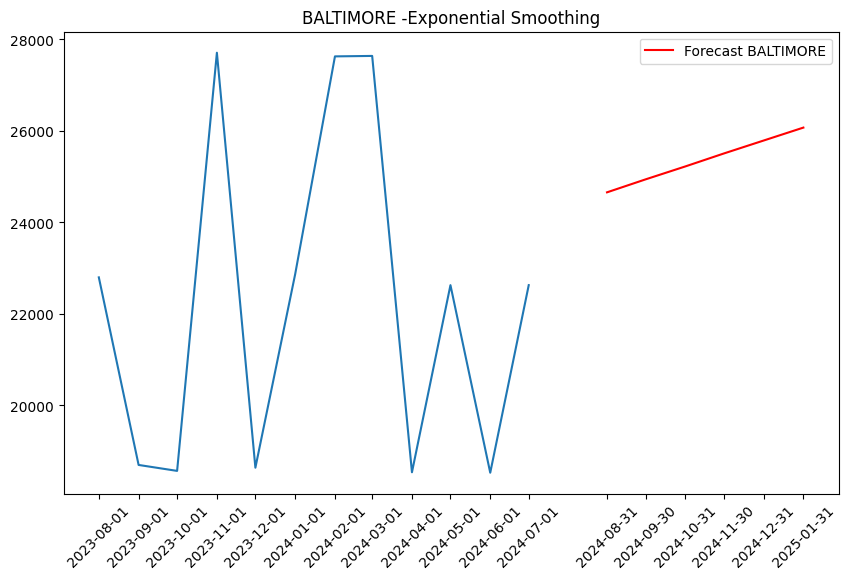

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


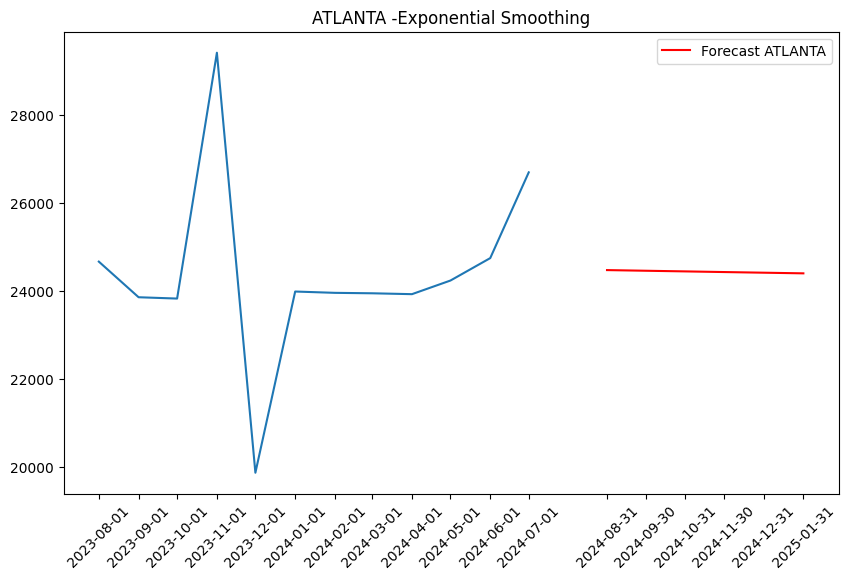

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


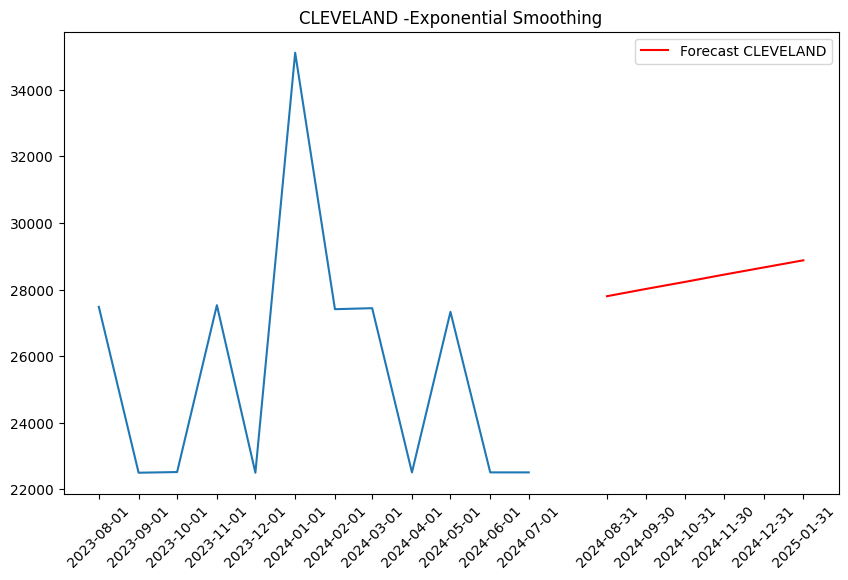

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


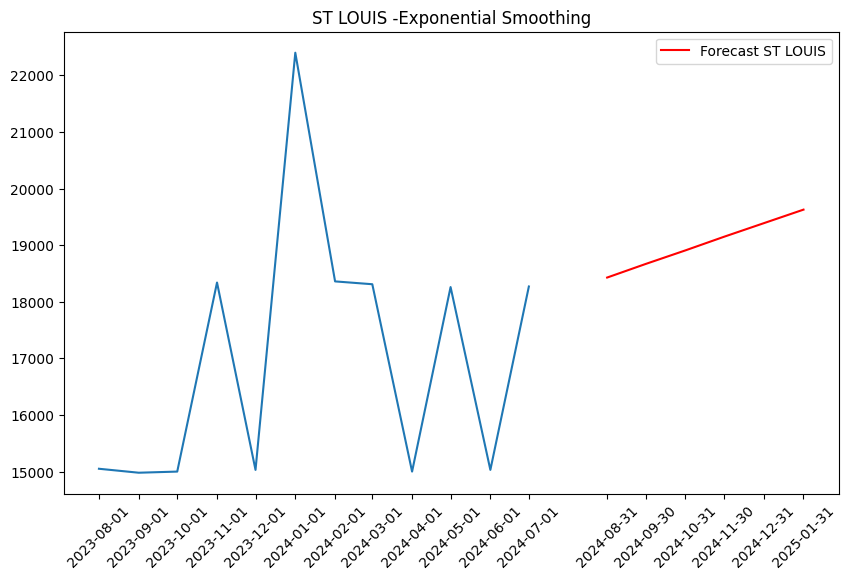

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


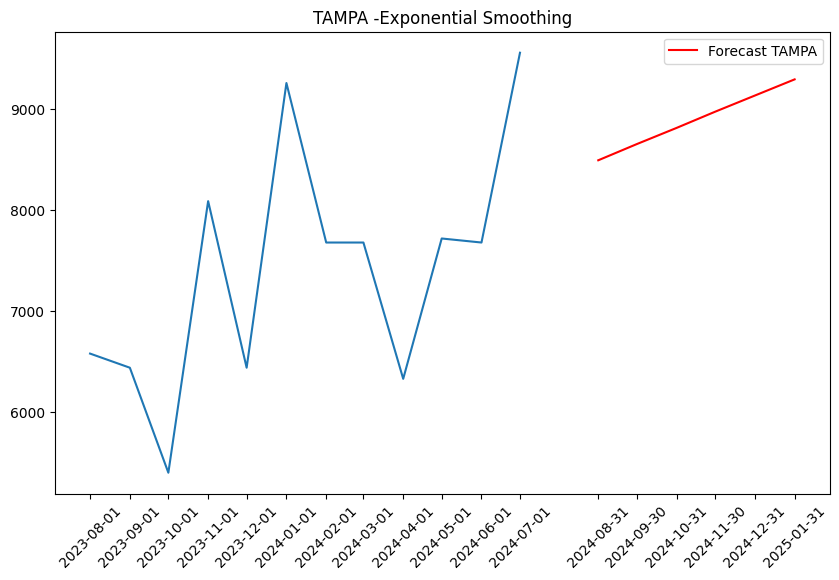

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


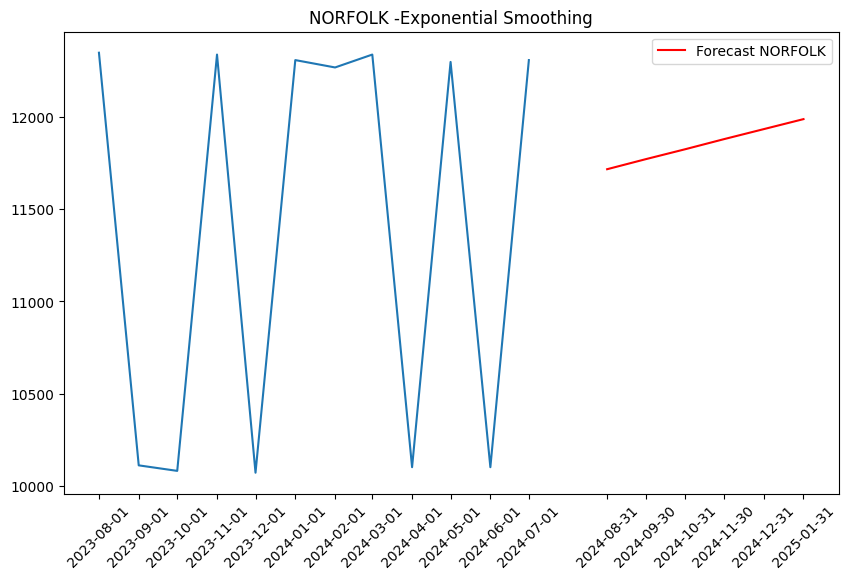

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


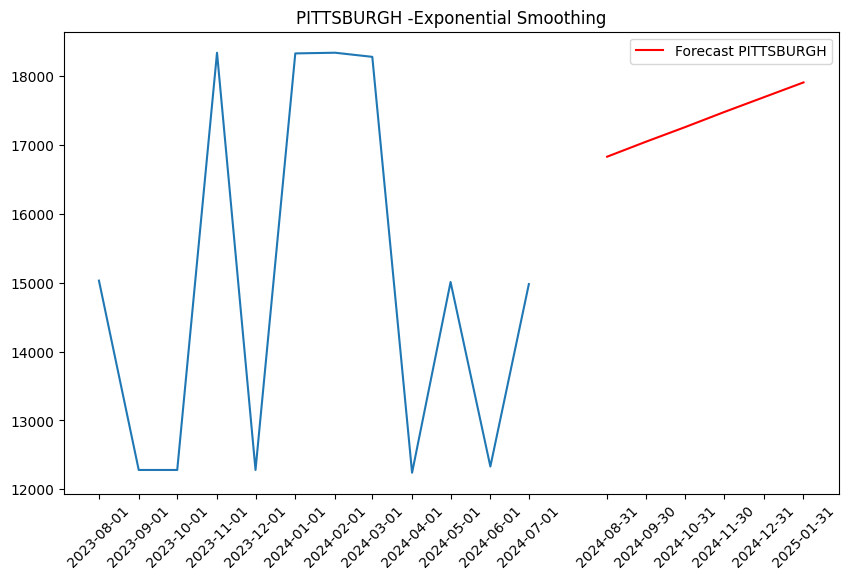

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


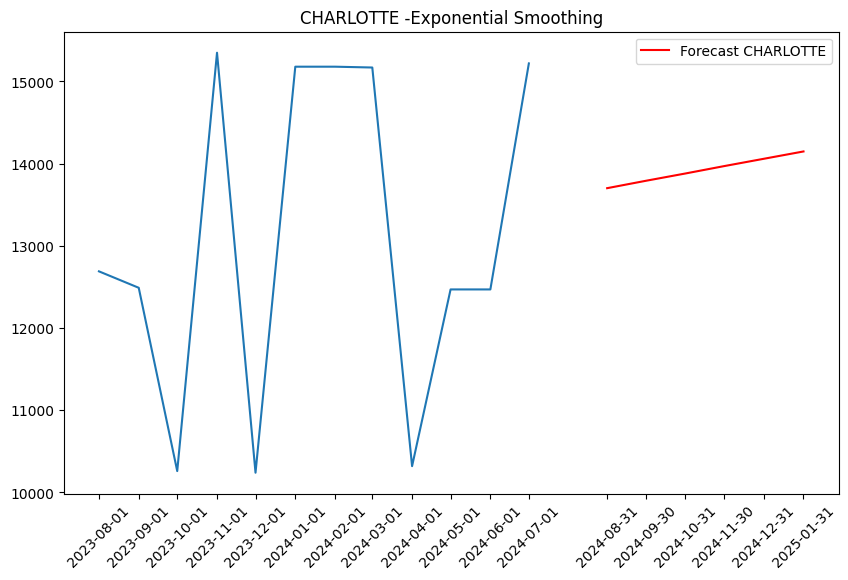

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


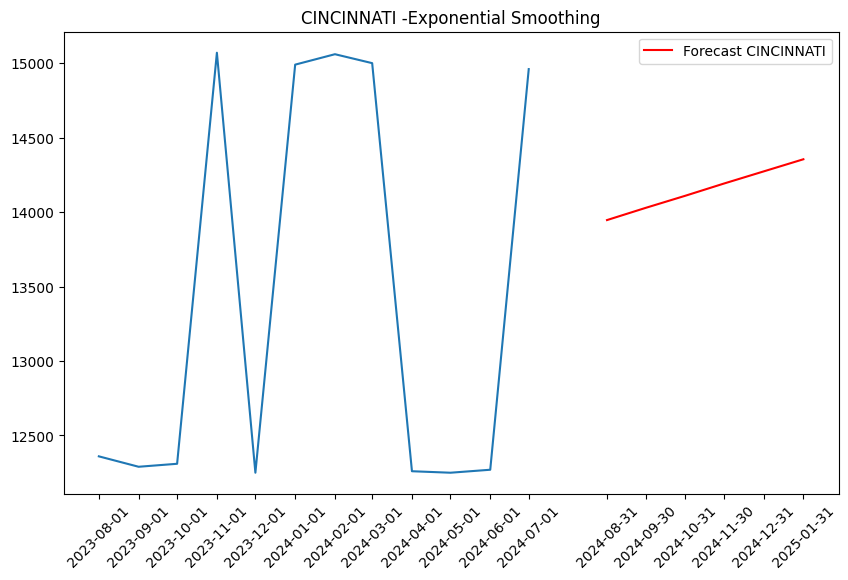

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


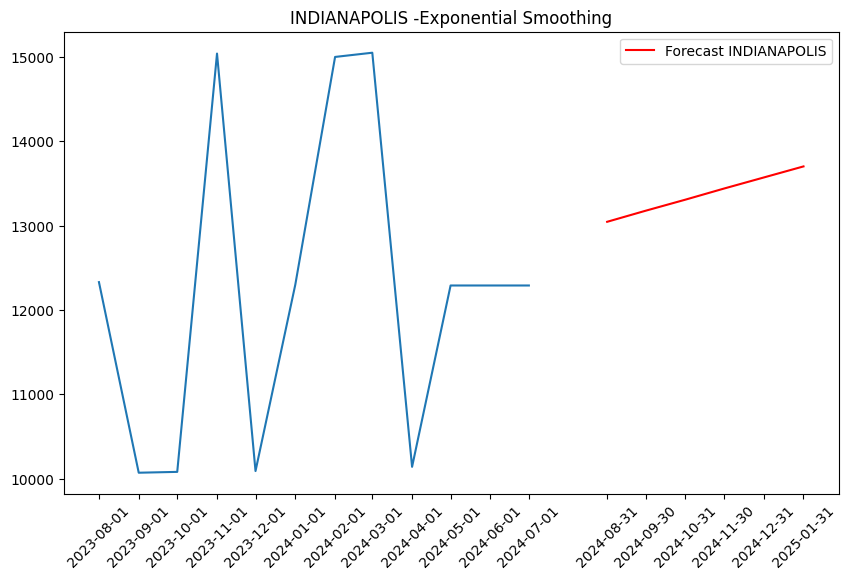

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


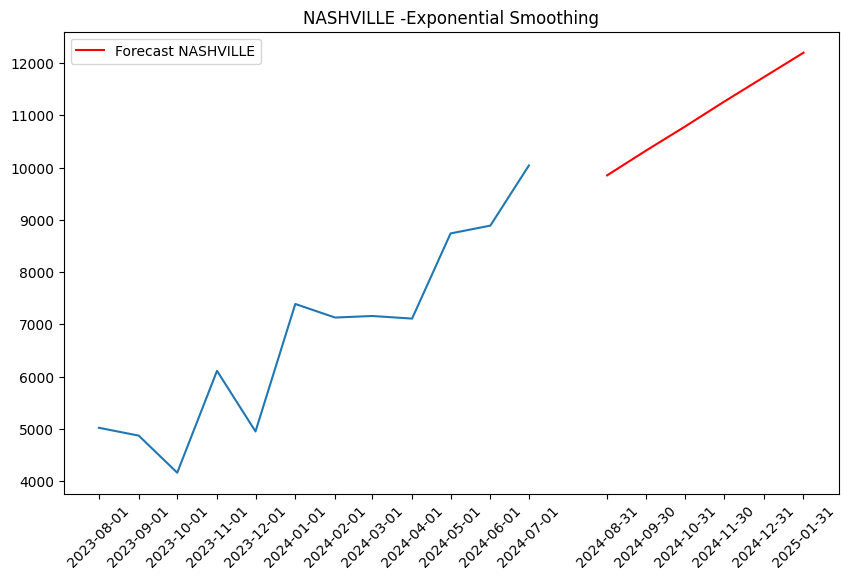

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


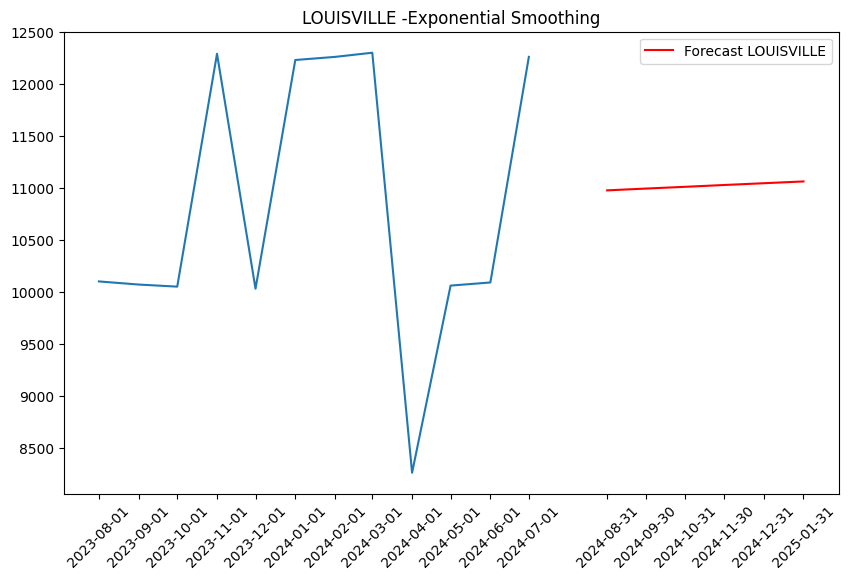

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


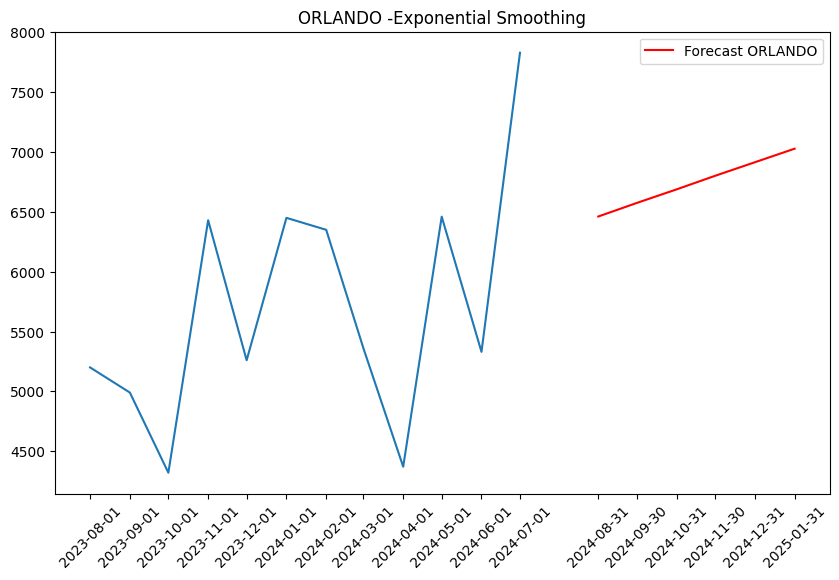

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


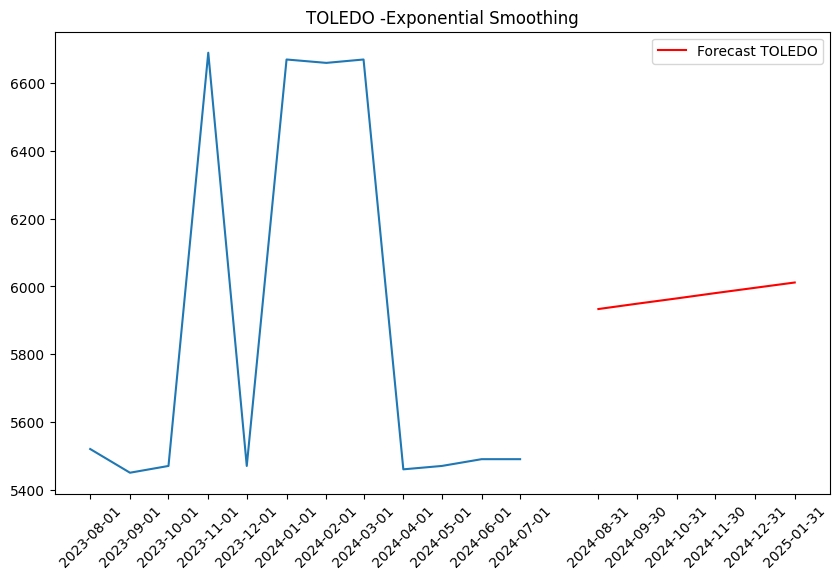

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


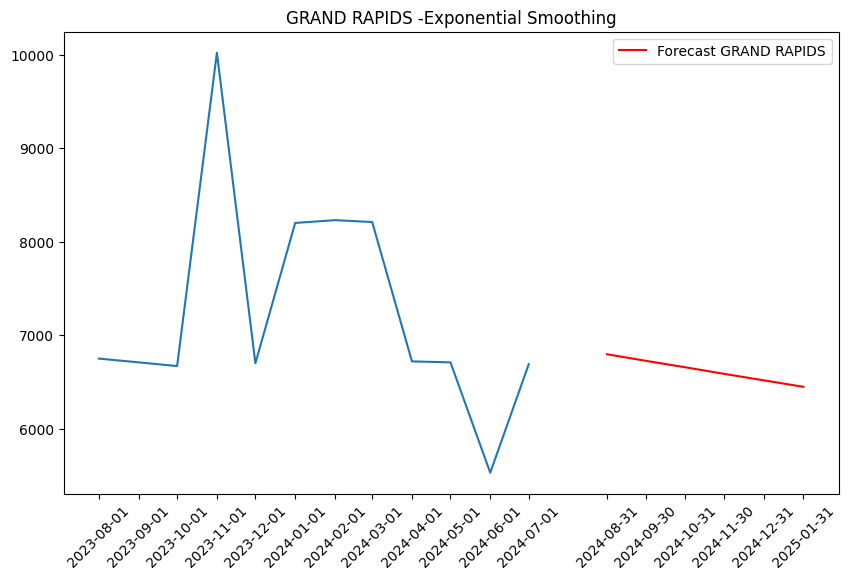

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


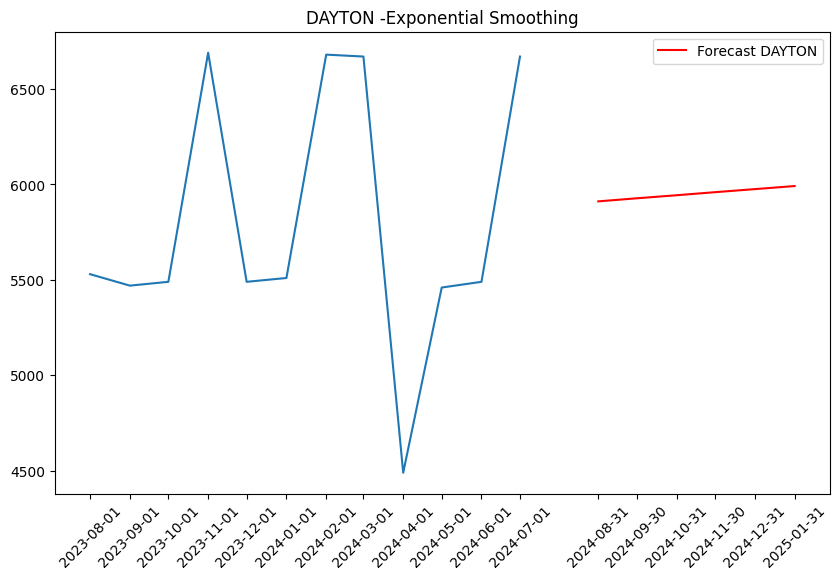

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


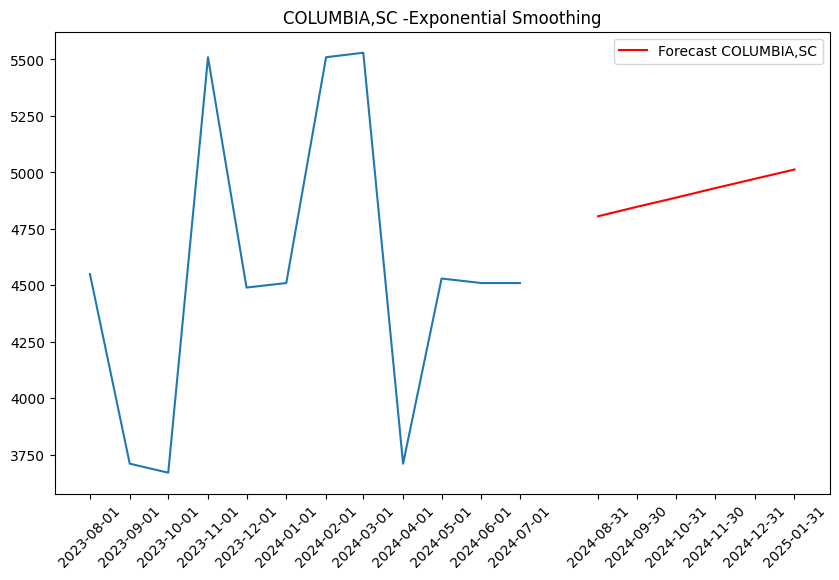

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


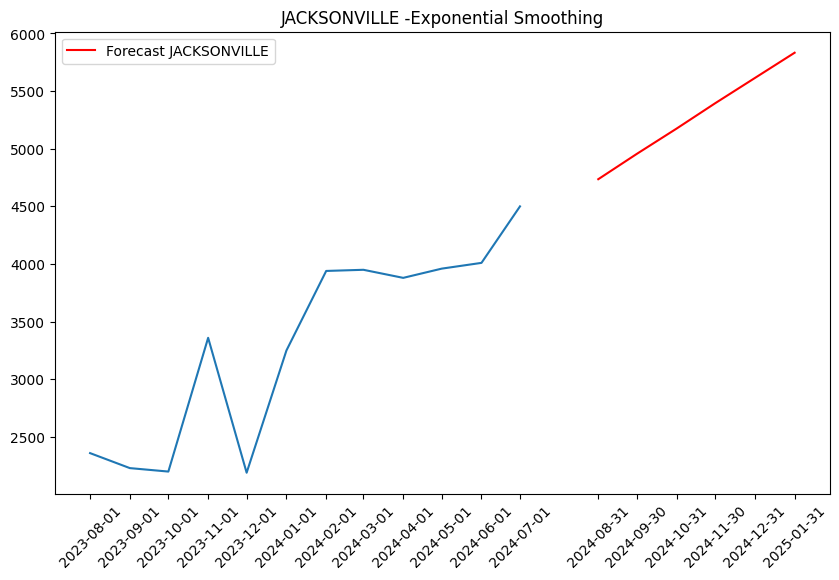

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


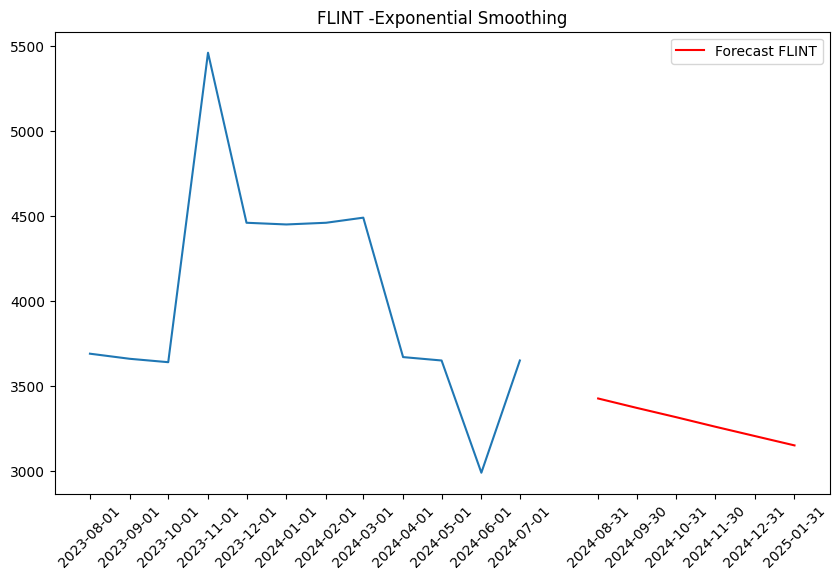

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


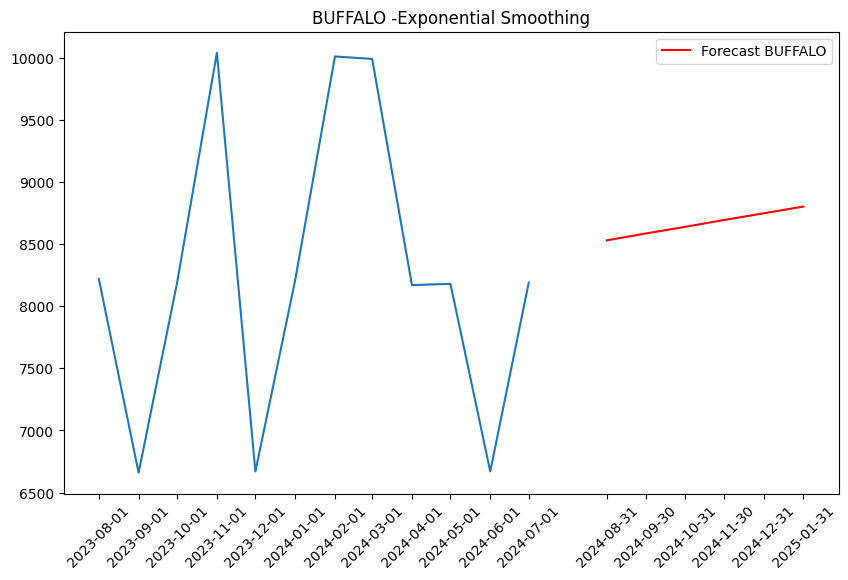

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


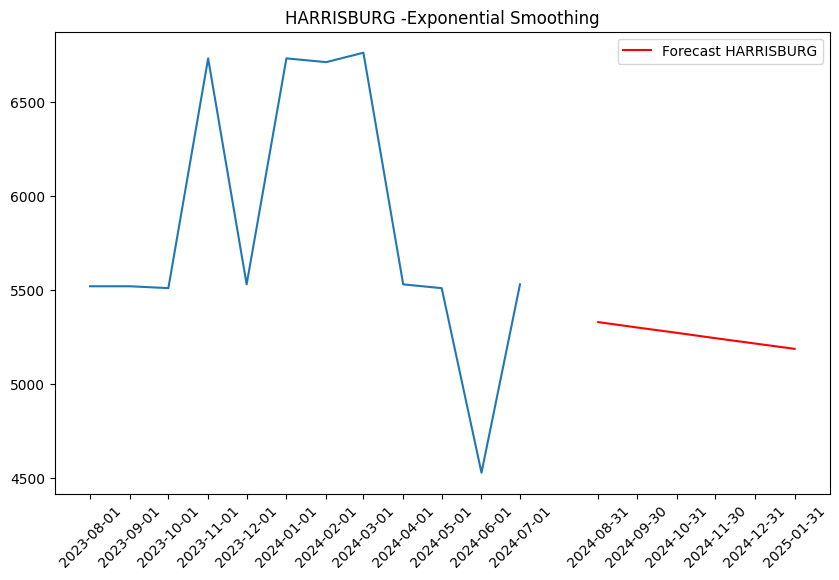

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


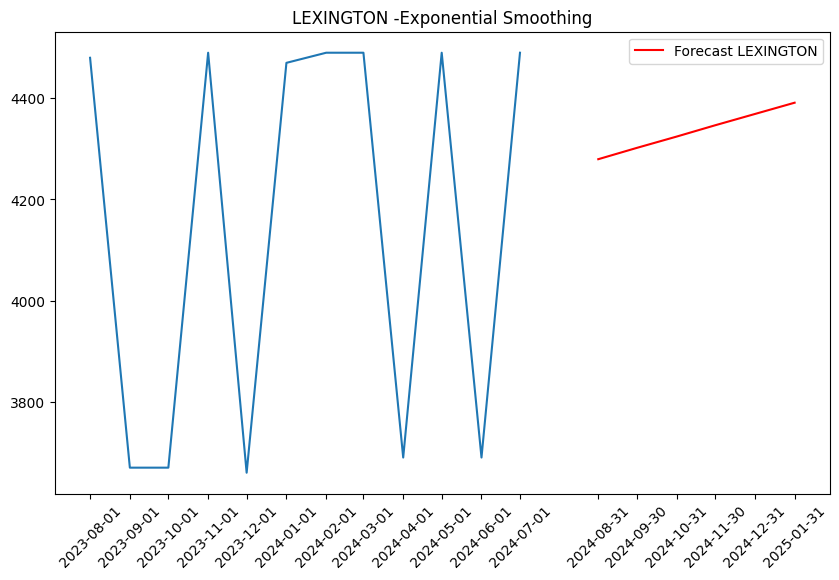

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


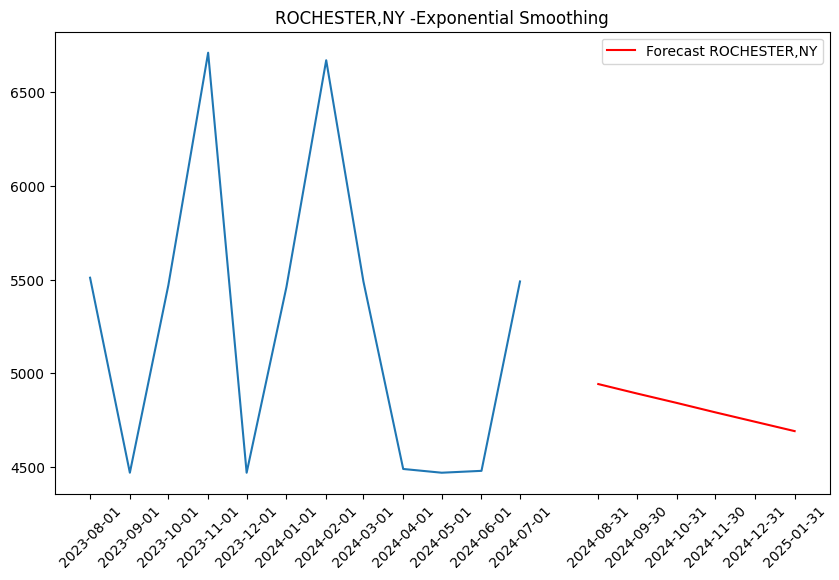

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


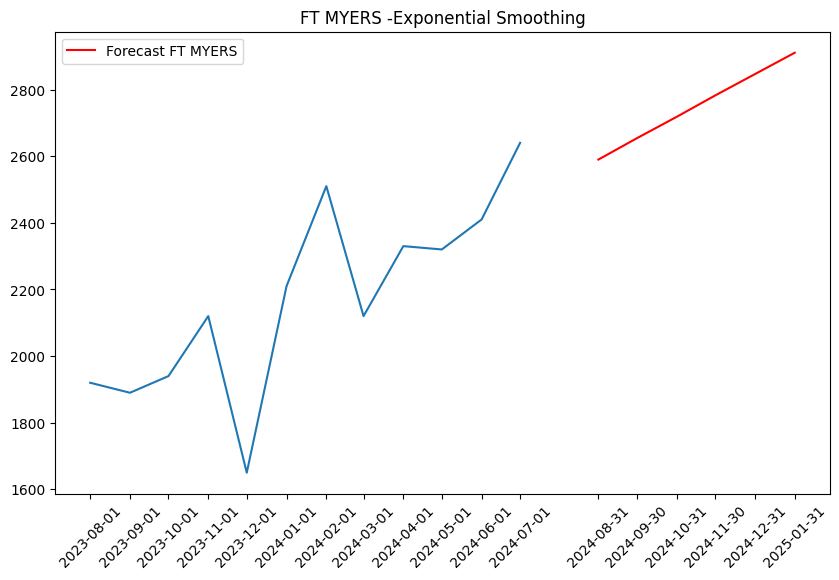

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


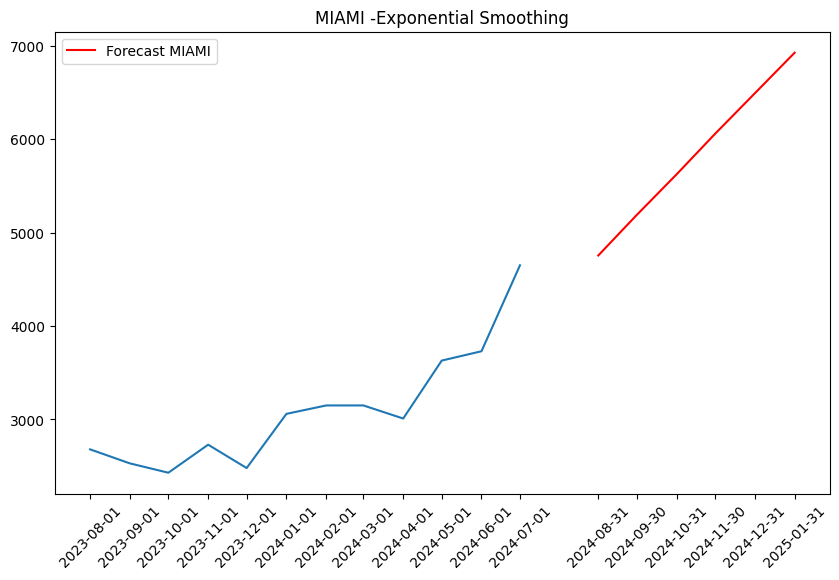

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


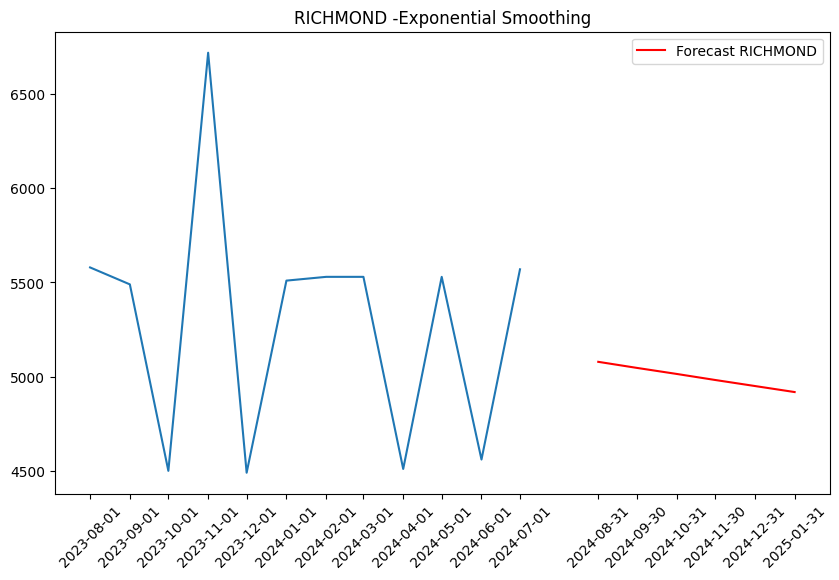

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


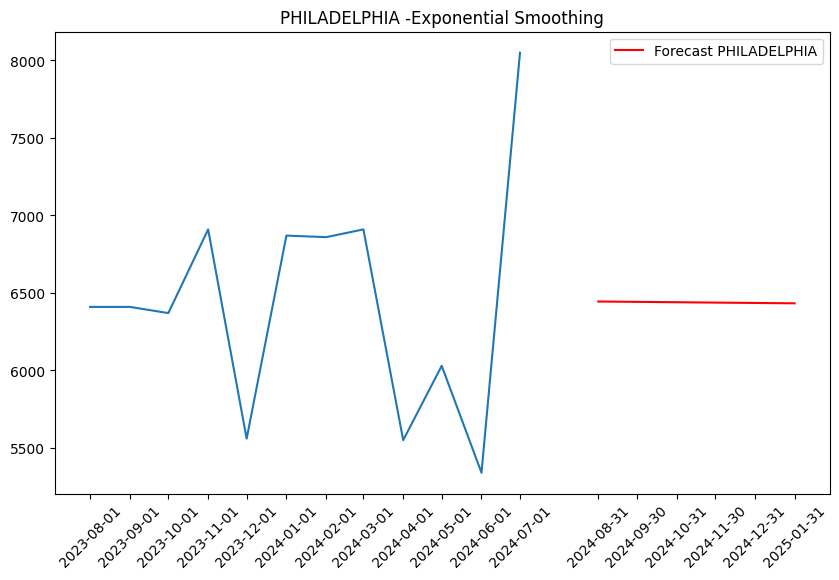

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


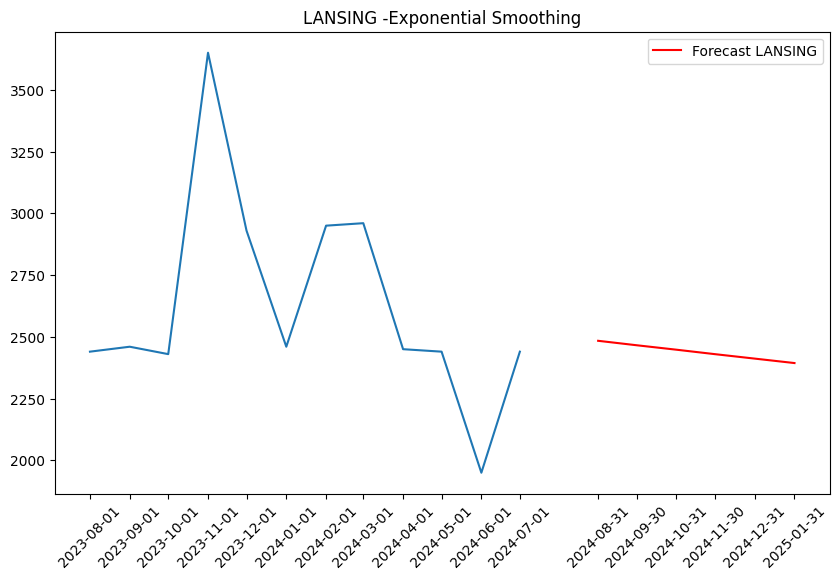

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


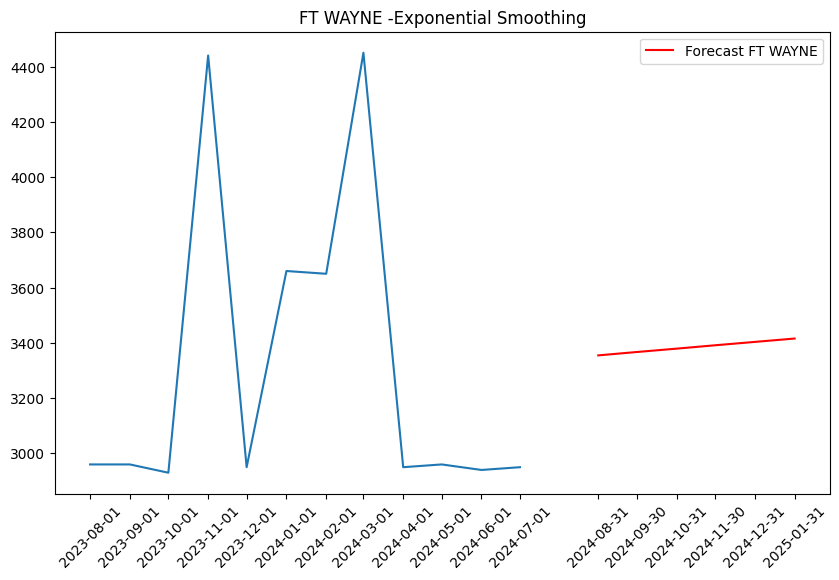

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


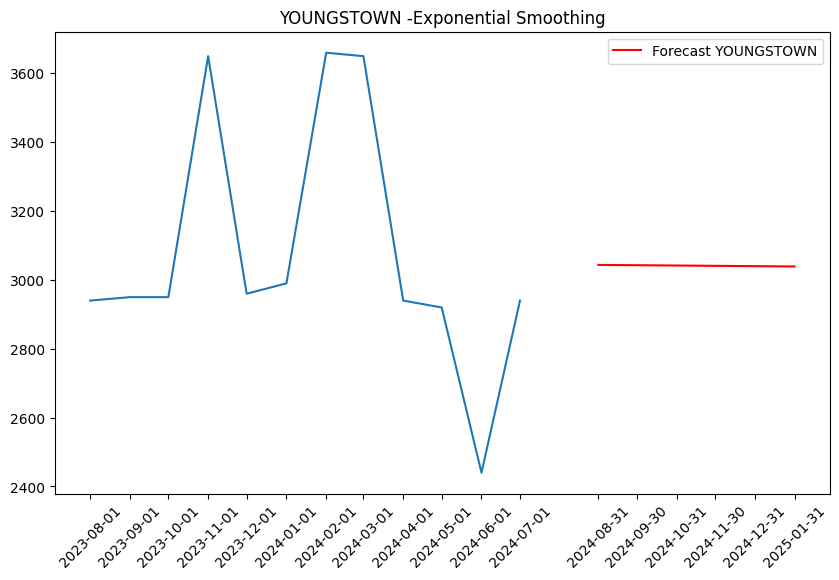

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


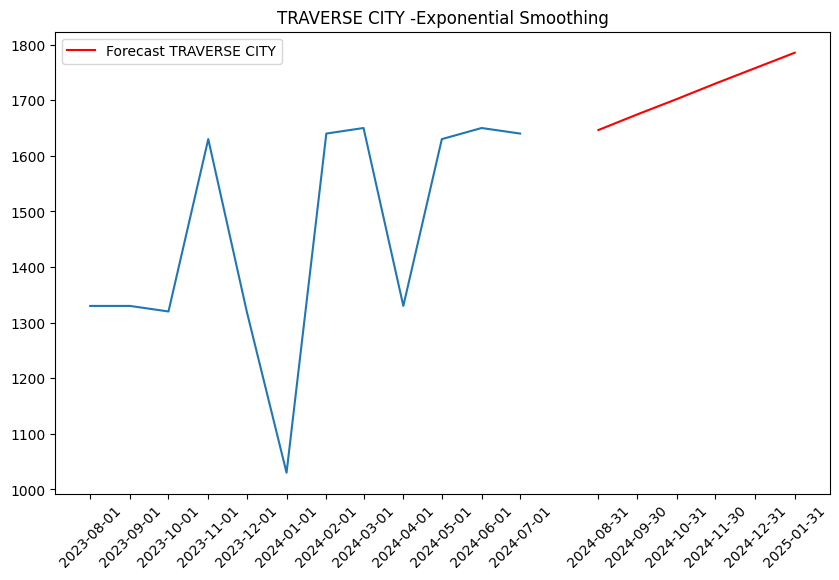

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


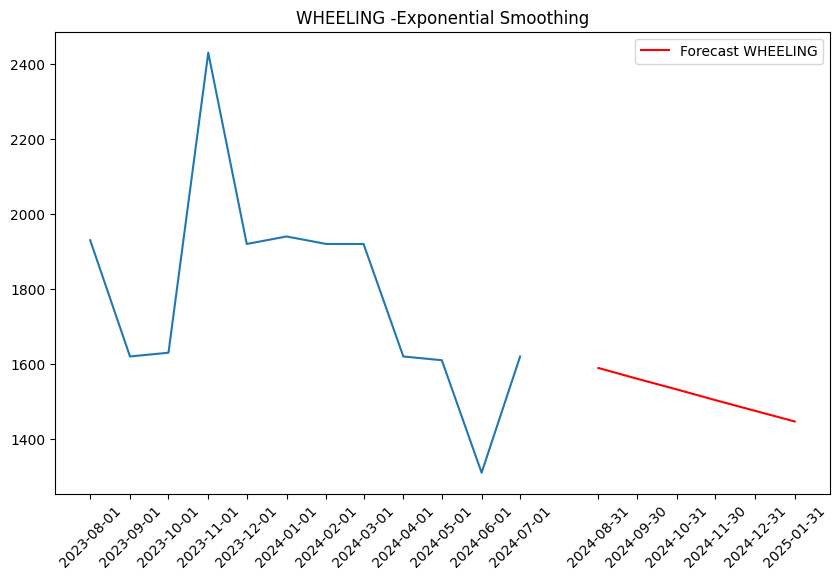

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


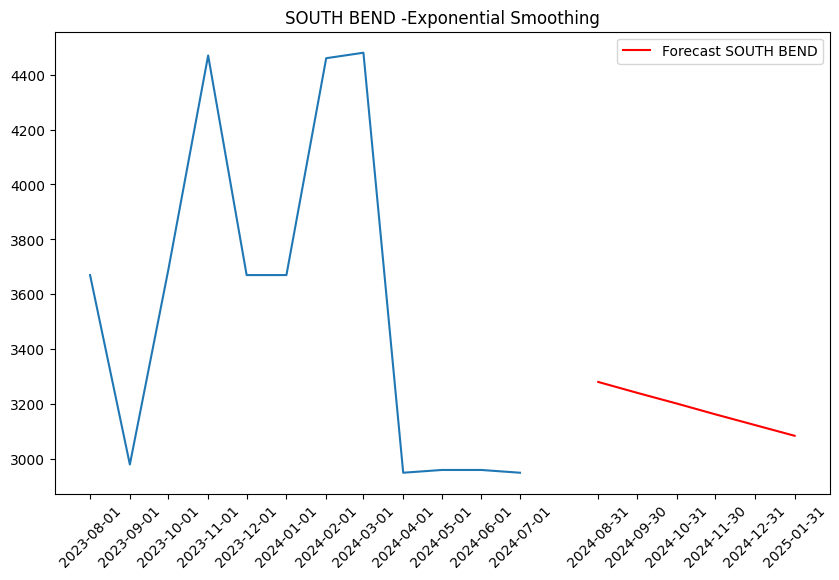

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


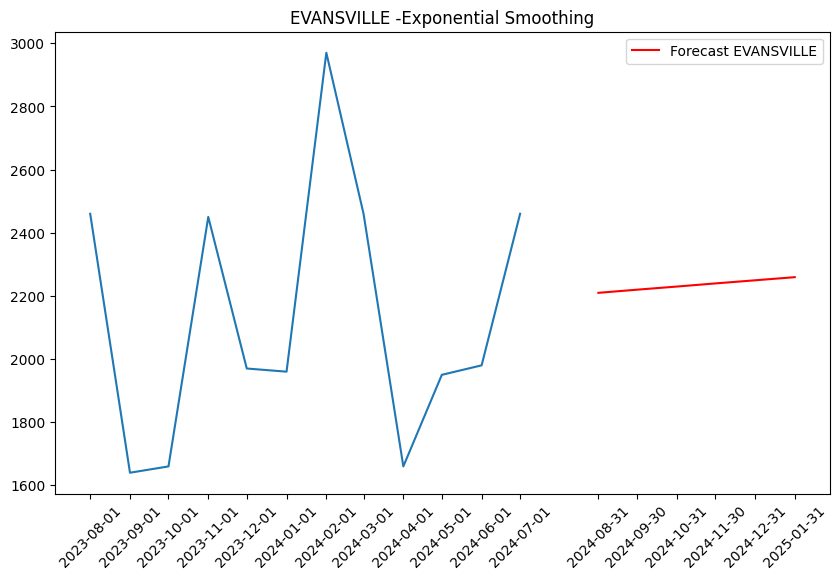

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


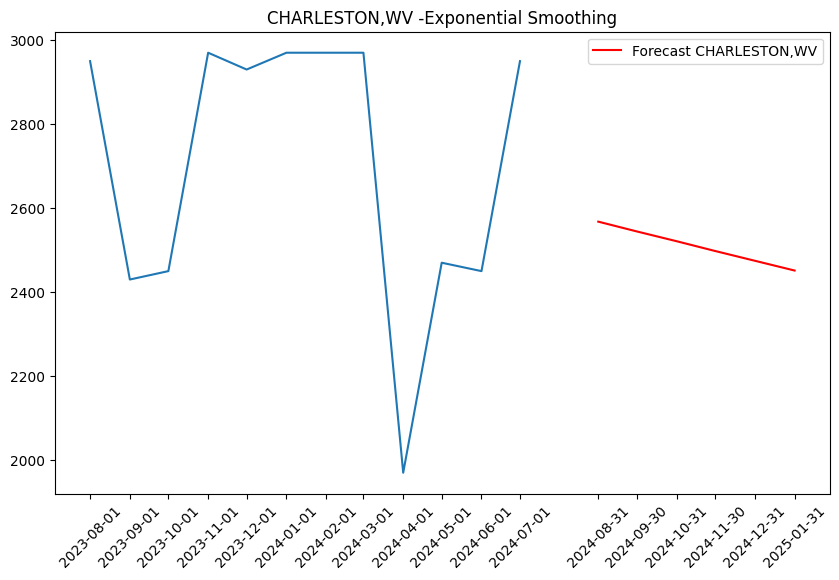

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


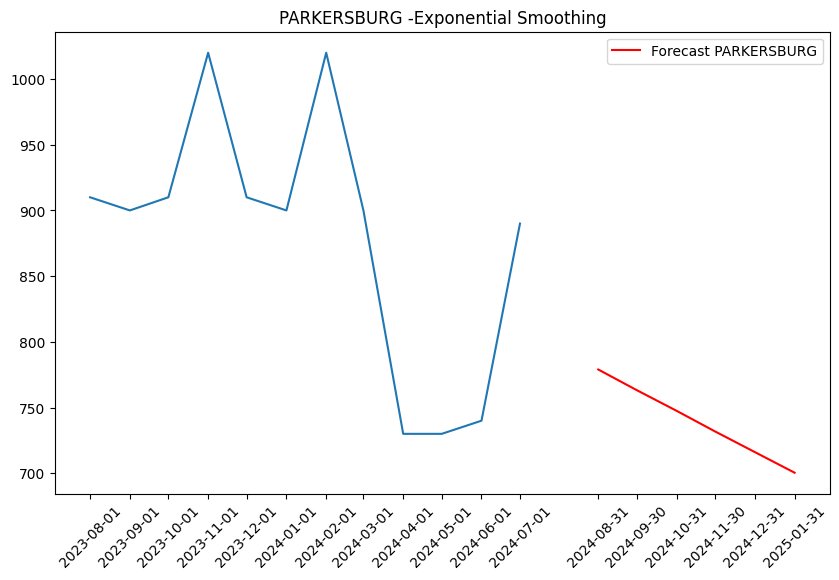

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


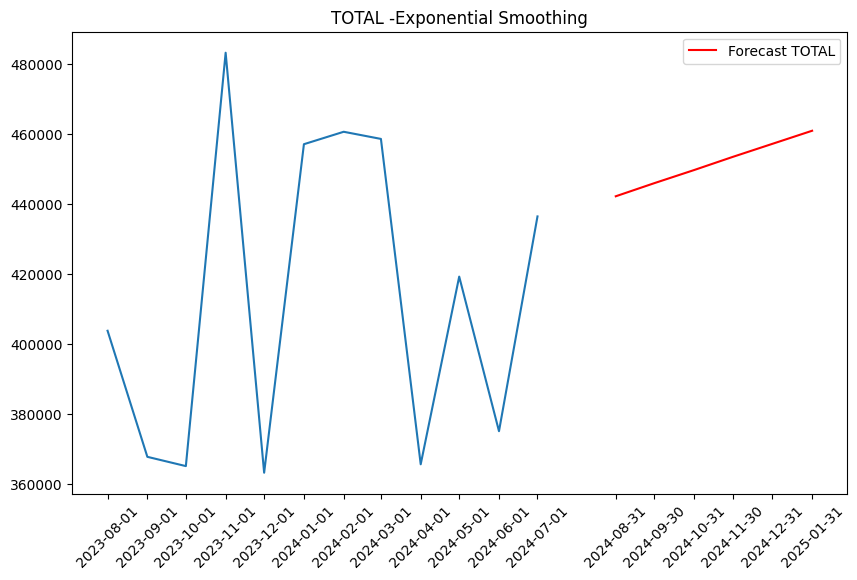

                 CHICAGO       DETROIT  WASHINGTON,DC   COLUMBUS,OH  \
2024-08-01  51651.317983  38281.626159   32534.601480  21848.985328   
2024-09-01  52447.434436  38534.409510   32587.993734  21904.802245   
2024-10-01  53243.550890  38787.192861   32641.385989  21960.619162   
2024-11-01  54039.667344  39039.976213   32694.778243  22016.436079   
2024-12-01  54835.783798  39292.759564   32748.170498  22072.252996   
2025-01-01  55631.900252  39545.542915   32801.562752  22128.069913   

               BALTIMORE       ATLANTA     CLEVELAND      ST LOUIS  \
2024-08-01  24658.494398  24467.345119  27799.765811  18428.012744   
2024-09-01  24941.460418  24452.544647  28015.336564  18667.995105   
2024-10-01  25224.426438  24437.744175  28230.907317  18907.977466   
2024-11-01  25507.392458  24422.943703  28446.478070  19147.959826   
2024-12-01  25790.358478  24408.143231  28662.048823  19387.942187   
2025-01-01  26073.324497  24393.342759  28877.619576  19627.924548   

           

In [ ]:
from re import X
forecasts={}
forecast_periods=6
forecast_start_date=df.index[-1]
forecast_dates=pd.date_range(start=forecast_start_date, periods=forecast_periods+1, freq='M')[1:]

for x in df.columns:
  dma_series=df[x]
  model=ExponentialSmoothing(dma_series, trend='add',initialization_method='estimated')
  model_fit=model.fit(optimized=True)

  forecast=model_fit.forecast(steps=forecast_periods)
 # print(forecast)
  forecasts[x]=forecast
  plt.figure(figsize=(10, 6))
  plt.plot(dma_series.index, dma_series)
  plt.plot(forecast_dates, forecast, label=f'Forecast {x}', color='red')
  all_dates = dma_series.index.append(forecast_dates)
  plt.xticks(all_dates, rotation=45)  # Rotate the dates for better readability

  plt.title(f'{x} -Exponential Smoothing')
  plt.legend()
  plt.show()


# Convert the forecasted values into a DataFrame
forecast_df = pd.DataFrame( forecasts)

print(forecast_df)

